# Libraries

In [1]:
library(tidyverse)
library(dagitty)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Question

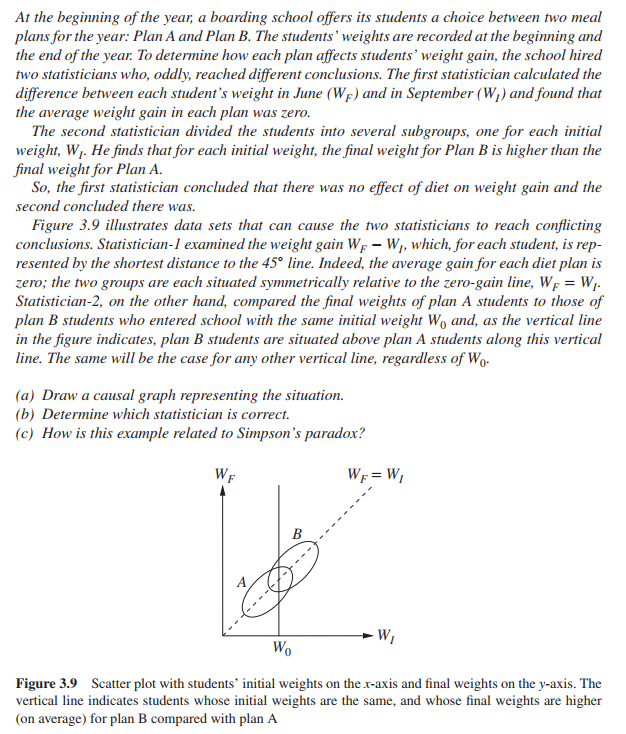

# Solution

## (a)

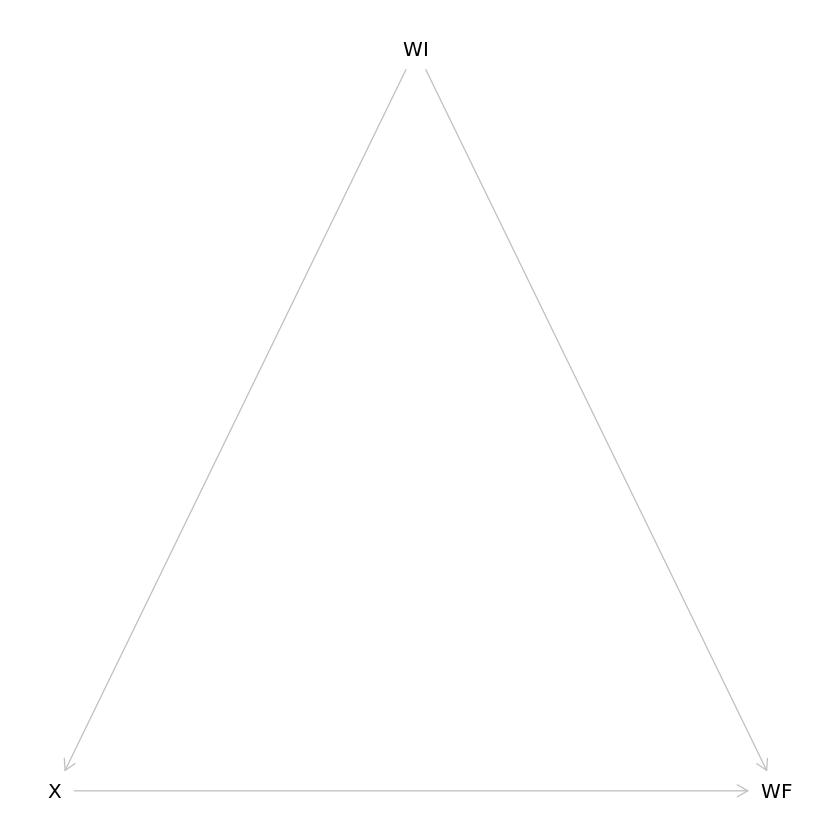

In [2]:
g <- dagitty('dag{
    WI -> X
    WI -> WF
    X -> WF
    X [exposure]
    WF [outcome]
}
')

coordinates(g) <- list(x = c(WI = 2.5, WF = 3, X = 2),
                       y = c(WI = -1, WF = 1, X = 1))
plot(g)

## (b)

In [3]:
adjustmentSets(g, exposure = "X", outcome = "WF")

{ WI }

Threfore, we need to account for the initial weight, $W_I$ when measuring the causal effect of $X$ on $Y$.

Therefore, statistician-2's analysis is correct.

If $W_I$ does not influence $X$:

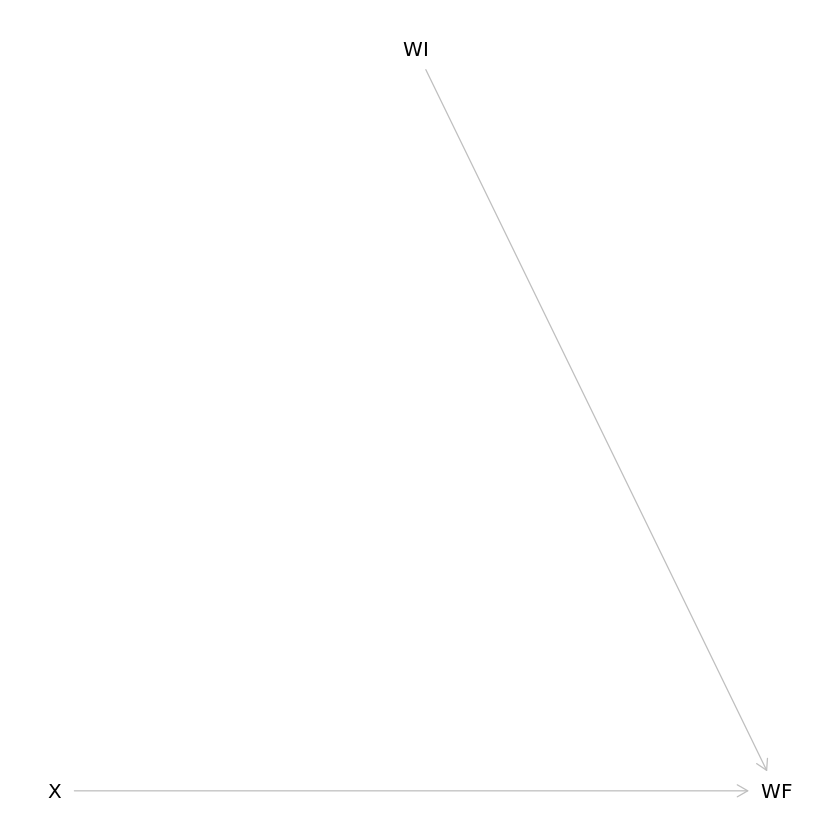

In [4]:
g <- dagitty('dag{
    WI -> WF
    X -> WF
    X [exposure]
    WF [outcome]
}
')

coordinates(g) <- list(x = c(WI = 2.5, WF = 3, X = 2),
                       y = c(WI = -1, WF = 1, X = 1))
plot(g)

In [5]:
adjustmentSets(g, exposure = "X", outcome = "WF")

 {}

We don't need to adjust for any variables!

If we wanted to compute the effect of weight $X$ on weight gain, $G = W_F - W_I$ our DAG is (assuming the same causal model in part (a):

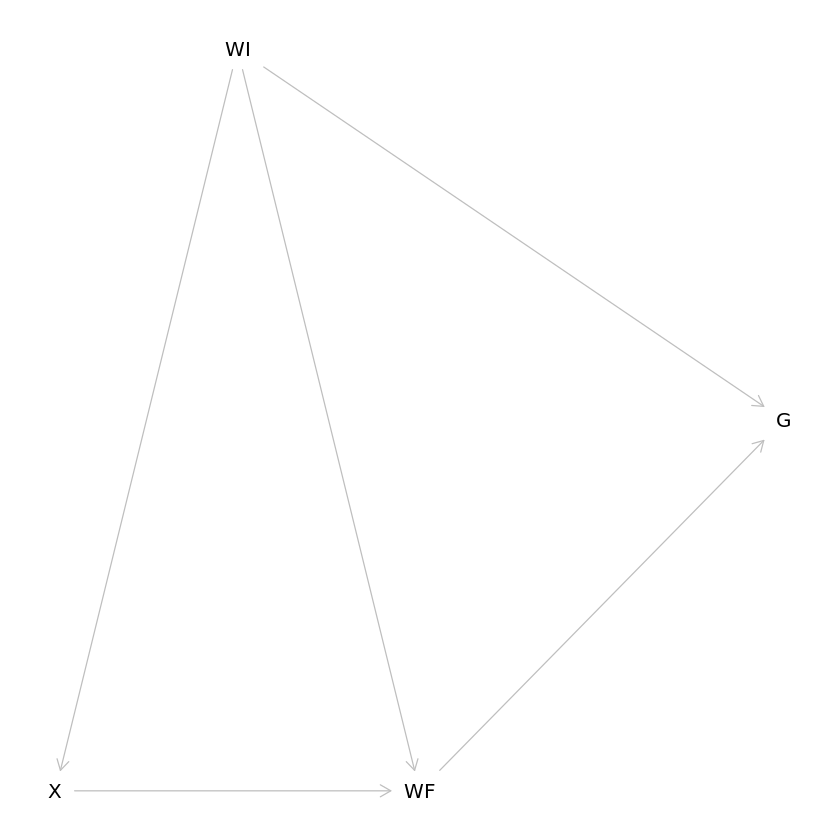

In [6]:
g <- dagitty('dag{
    WI -> X
    WI -> WF
    X -> WF
    WI -> G
    WF -> G
    X [exposure]
    G [outcome]
}
')

coordinates(g) <- list(x = c(WI = 2.5, WF = 3, X = 2, G = 4),
                       y = c(WI = -1, WF = 1, X = 1, G = 0))
plot(g)

In [7]:
adjustmentSets(g)

{ WI }

In [8]:
isCollider(g, "X", "WF", "WI")

[1] TRUE

So, even if we were actually interested to compute the difference in weight $G = W_F - W_I$ under plan A and B, we still need to account for $W_I$.

## (c)

[Lord's Paradox](https://en.wikipedia.org/wiki/Lord%27s_paradox) is the continuous version of [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox).